# Load Gender Words

In [1]:
from compute_gender_bias import Gender_Bias

domains = ["WEAT_Topic_Female", "WEAT_Topic_Male", "WEAT_Topic_Family"]


gender_profile_lang = Gender_Bias(domains)
gender_profile_lang.load_embeddings(start=0, end=200)

gender_profile_lang.load_weat_words()
gender_profile_lang.create_data_store_stats()
print("Done!")

WEAT Dataset Loading
WEAT_Topic_Family ['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives']
WEAT_Topic_Male ['he', 'his', 'man', 'male', 'boy', 'son', 'brother', 'father', 'uncle', 'gentleman']
WEAT_Topic_Female ['she', 'her', 'woman', 'female', 'girl', 'daughter', 'sister', 'mother', 'aunt', 'lady']
Done!


## Compute Regression Params and Bias Scores for Randomized Domain Words

In [2]:
from plotting_utility import compute_bias_without_plot
import time

lang_regression = []
start = time.time()

for k in range(0, 1000):
    gender_profile_lang.randomize_weat_words()
    gender_profile_lang.create_data_store_stats()

    regression_params, bias_score = compute_bias_without_plot(gender_profile_lang)
    lang_regression.append(regression_params[0])
    
end = time.time()

# Load Domain Words

In [3]:
domains = ["WEAT_Topic_Female", "WEAT_Topic_Male", "WEAT_Topic_Family", \
                "WEAT_Topic_Career", "WEAT_Topic_Science", "WEAT_Topic_Arts"]


gender_profile_lang = Gender_Bias(domains)
gender_profile_lang.load_embeddings(start=0, end=200)

gender_profile_lang.load_weat_words()
gender_profile_lang.create_data_store_stats()
print("Done!")

WEAT Dataset Loading
WEAT_Topic_Career ['executive', 'management', 'professional', 'corporation', 'salary', 'office', 'business', 'career']
WEAT_Topic_Family ['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives']
WEAT_Topic_Arts ['poetry', 'art', 'dance', 'literature', 'novel', 'symphony', 'drama', 'sculpture', 'shakespeare']
WEAT_Topic_Male ['he', 'his', 'man', 'male', 'boy', 'son', 'brother', 'father', 'uncle', 'gentleman']
WEAT_Topic_Female ['she', 'her', 'woman', 'female', 'girl', 'daughter', 'sister', 'mother', 'aunt', 'lady']
WEAT_Topic_Science ['science', 'technology', 'physics', 'chemistry', 'einstein', 'nasa', 'experiment', 'astronomy']
Done!


## Compute Regression Params and Bias Scores for Domain Words

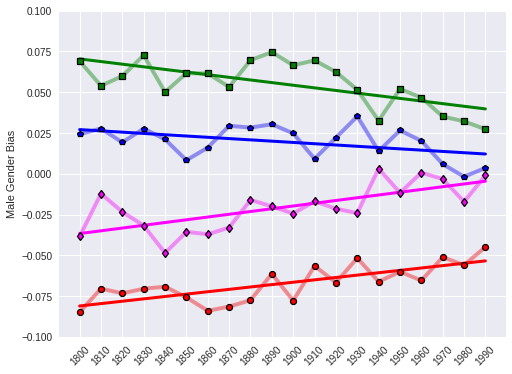

In [4]:
from plotting_utility import compute_bias_against_weat

regression_params, bias_scores = compute_bias_against_weat(gender_profile_lang)


### Changes in Associations over Time of Domain Words w.r.t. the Randomized Word Lists

In [5]:
import numpy as np
import scipy

slope = []
intercept = []
for i in range(0, len(lang_regression)):
    slope.append(lang_regression[i][2])
    intercept.append(lang_regression[i][3])

slope_mean = np.average(slope)
slope_std = np.std(slope)
print("Slope Mean/STD: ", slope_mean, slope_std)

print("Compute P-value of Slope for " + lang_regression[0][0])
for i in range(len(regression_params)):
    slope_z_score = (regression_params[i][2] - slope_mean) / slope_std
    p_value = scipy.stats.norm.sf(abs(slope_z_score))
    print("P-value for " + regression_params[i][1] + ": " + str(p_value))
print()

intercept_mean = np.average(intercept)
intercept_std = np.std(intercept)
print("Intercept Mean/STD: ", intercept_mean, intercept_std)

print("Compute P-value of Intercept for " + lang_regression[0][0])
for i in range(len(regression_params)):
    intercept_z_score = (regression_params[i][3] - intercept_mean) / intercept_std
    p_value = scipy.stats.norm.sf(abs(intercept_z_score))
    print("P-value for " + regression_params[i][1] + ": " + str(p_value))


Slope Mean/STD:  3.294847574840392e-06 3.3129287892635256e-05
Compute P-value of Slope for Male-Female
P-value for Family: 8.723497460030098e-06
P-value for Career: 3.3510116796802226e-07
P-value for Science: 0.006623693468551812
P-value for Arts: 2.8479470099579173e-07

Intercept Mean/STD:  -0.006105782749059596 0.06305011351402345
Compute P-value of Intercept for Male-Female
P-value for Family: 4.499467123763953e-08
P-value for Career: 2.9425938873354333e-09
P-value for Science: 0.0027606105545343713
P-value for Arts: 5.504195365784846e-08


# Plotting the Histogram of Significance Test

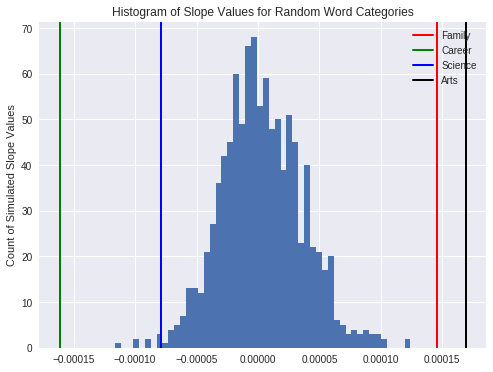

In [6]:
import matplotlib.pyplot as plt
color = ["red", "green", "blue", "black"]

plt.figure(figsize=(8, 6))
plt.hist(slope, bins=50)
plt.title("Histogram of Slope for " + lang_regression[0][0])

l = 0
for i in range(len(regression_params)):
    plt.axvline(regression_params[i][2], linewidth=2., \
                color=color[l], label=regression_params[i][1])
    l += 1
plt.legend(loc=1)

plt.ylabel("Count of Simulated Slope Values")
plt.title("Histogram of Slope Values for Random Word Categories")
plt.show()